# Visualization of Similarity Analysis

In [57]:
### used to set the interpreter searching path
import sys
target_path = '/home/jovyan/ulmo/'
sys.path.append(target_path)

In [7]:
%matplotlib inline

from importlib import reload
import os
import numpy as np
from pkg_resources import resource_filename

import pandas

import h5py
import seaborn as sns
import pandas as pd
#import umap
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.ssl.train_util import modis_loader, set_model
from ulmo.ssl.train_util import Params, option_preprocess
from ulmo.ssl import latents_extraction

import torch

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from tqdm import trange

In [8]:
llc_modis_2012_latents_path = "/home/jovyan/ulmo/ulmo/runs/SSL/llc_ssl/experiments/LLC_MODIS_2012_latents/"
llc_modis_2012_latents = os.path.join(llc_modis_2012_latents_path, os.listdir(llc_modis_2012_latents_path)[1])
llc_modis_2012_reduced_latents = os.path.join(llc_modis_2012_latents_path, os.listdir(llc_modis_2012_latents_path)[2])

In [9]:
with h5py.File(llc_modis_2012_latents, 'r') as f:
    latents_llc_modis_2012 = f['valid'][:]

In [10]:
with h5py.File(llc_modis_2012_reduced_latents, 'r') as f:
    latents_reduced_llc_modis_2012 = f['latents_umap'][:]

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [12]:
num_samples = latents_reduced_llc_modis_2012.shape[0]
print(num_samples)

635295


In [13]:
nbrs = NearestNeighbors(n_neighbors=1024, algorithm='ball_tree').fit(latents_reduced_llc_modis_2012)
distances, indices = nbrs.kneighbors(latents_reduced_llc_modis_2012)

In [15]:
np.random.seed(0)
indice_sampled = np.random.choice(indices.shape[0], 5)

In [16]:
indice_sets = indices[indice_sampled]
dist_sets = distances[indice_sampled]

In [17]:
indice_sets.shape

(5, 1024)

In [58]:
reduced_latents_subset = []
for i in range(2):
    reduced_latents_subset.append(latents_reduced_llc_modis_2012[indice_sets[i]])

In [28]:
reduced_latents_subset = np.concatenate(reduced_latents_subset, axis=0)

In [29]:
num_samples = reduced_latents_subset.shape[0]
point_size = 100.0 / np.sqrt(num_samples)
width, height = 800, 800
dpi = 100

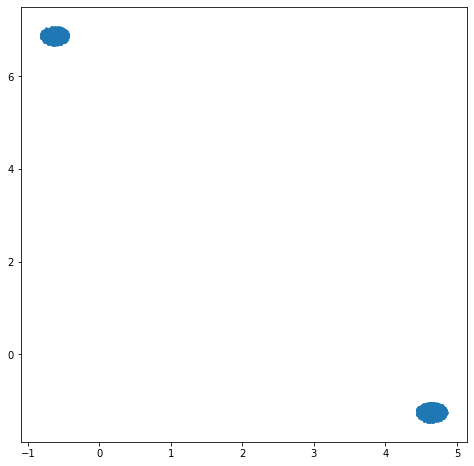

In [30]:
plt.figure(figsize=(width//dpi, height//dpi))
plt.scatter(reduced_latents_subset[:, 0], reduced_latents_subset[:, 1], s=point_size)

In [35]:
indices_combined = [indices[indice_sampled[0]], indices[indice_sampled[1]]]

In [38]:
indices_combined = np.concatenate(indices_combined, axis=0)

In [40]:
latents_subset = latents_llc_modis_2012[indices_combined]

In [49]:
sim_matrix = cosine_similarity(latents_subset)

In [54]:
sim_color = np.exp(sim_matrix[0])

<AxesSubplot:ylabel='Count'>

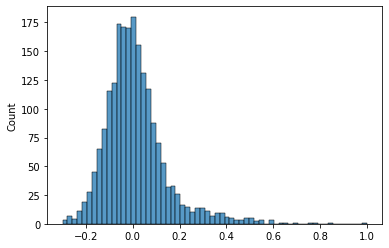

In [55]:
sns.histplot(sim_matrix[0])

<AxesSubplot:ylabel='Count'>

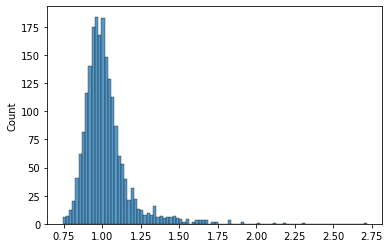

In [56]:
sns.histplot(sim_color)

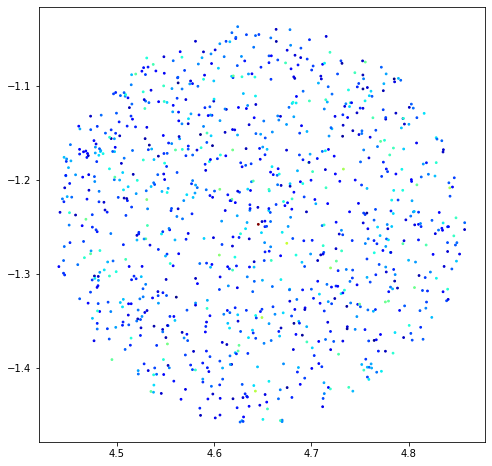

In [25]:
plt.figure(figsize=(width//dpi, height//dpi))
plt.scatter(reduced_latents_subset[:, 0], reduced_latents_subset[:, 1], s=point_size,
            c=sim_color, cmap='jet')

In [59]:
reduced_latents_subset = []
for i in range(5):
    reduced_latents_subset.append(latents_reduced_llc_modis_2012[indice_sets[i]])

In [60]:
reduced_latents_subset = np.concatenate(reduced_latents_subset, axis=0)

In [61]:
num_samples = reduced_latents_subset.shape[0]
point_size = 100.0 / np.sqrt(num_samples)
width, height = 800, 800
dpi = 100

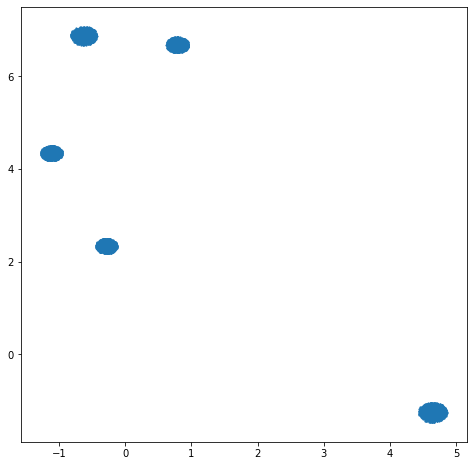

In [62]:
plt.figure(figsize=(width//dpi, height//dpi))
plt.scatter(reduced_latents_subset[:, 0], reduced_latents_subset[:, 1], s=point_size)

In [68]:
indices_combined = [indices[indice_sampled[i]] for i in range(5)]
indices_combined = np.concatenate(indices_combined, axis=0)

In [69]:
latents_subset = latents_llc_modis_2012[indices_combined]

In [70]:
sim_matrix = cosine_similarity(latents_subset)

In [71]:
sim_color = np.exp(sim_matrix[0])

<AxesSubplot:ylabel='Count'>

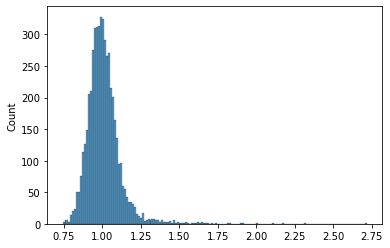

In [72]:
sns.histplot(sim_color)

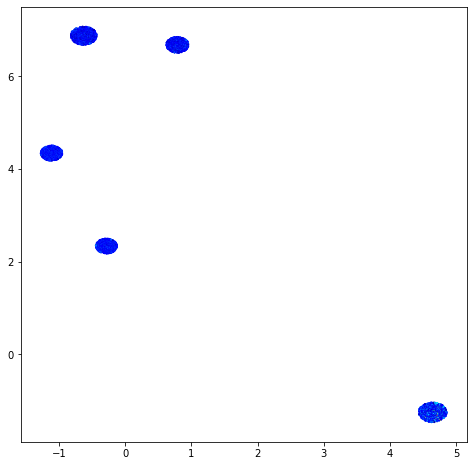

In [73]:
plt.figure(figsize=(width//dpi, height//dpi))
plt.scatter(reduced_latents_subset[:, 0], reduced_latents_subset[:, 1], s=point_size,
            c=sim_color, cmap='jet')